In [ ]:
!pip install --upgrade gspread

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [9]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb



In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [5]:
df = pandas.read_csv("iris.csv")
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VIRGINICA
146,6.3,2.5,5.0,1.9,VIRGINICA
147,6.5,3.0,5.2,2.0,VIRGINICA
148,6.2,3.4,5.4,2.3,VIRGINICA


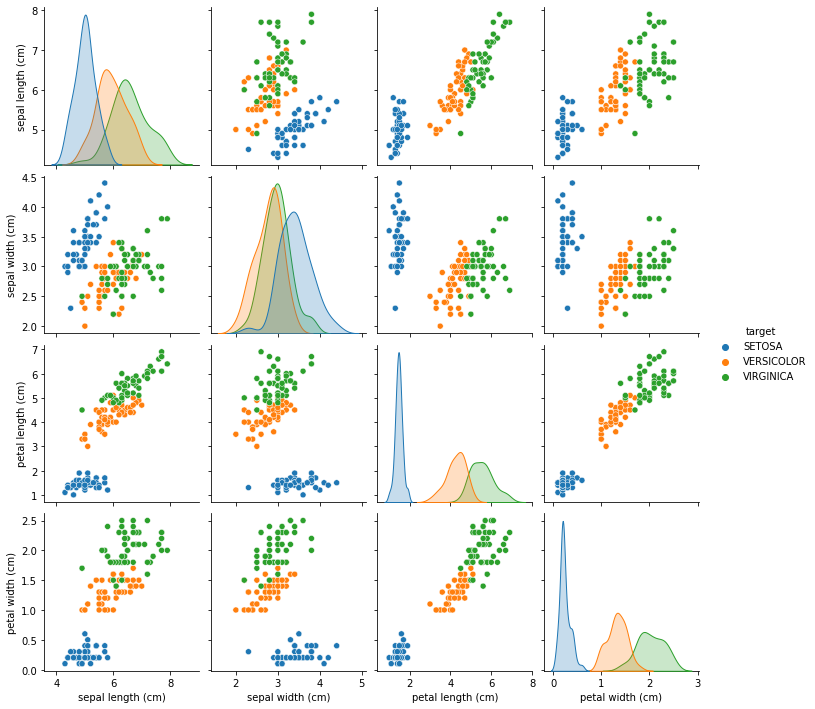

In [11]:
# O target serve para fornecer as classes
sb.pairplot(df,hue='target')

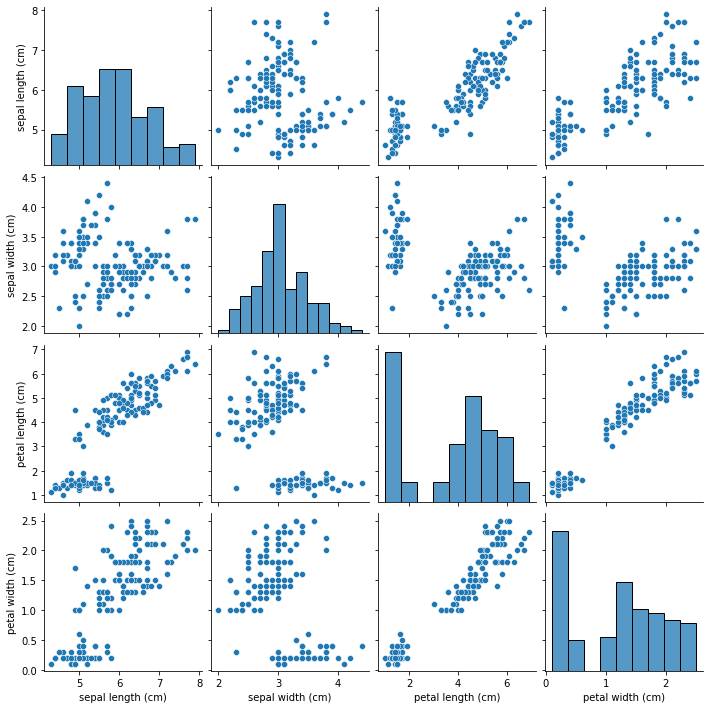

In [12]:
#Sem o target, o algoritmo irá dar as classes
sb.pairplot(df)

Ideia: Treinar o algoritmo para fornecer classes e comparar se essas classes são similares as classes já feitas

In [13]:
# X é convencionado para usar quando queremos chamar as features(características) do objeto. y é para classes
X=np.array(df.drop('target',axis=1))

In [14]:
X

**K Means**

In [15]:
from sklearn.cluster import KMeans

In [17]:
#kmeans=variavel
#random_state serve p/ poder reduzir as aleatoriedades
kmeans= KMeans(n_clusters=3, random_state=0)

In [18]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
## Para visualização de grupos:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

**Comparando as Classes Criadas com as classes existentes da Iris**

In [20]:
df['k-classes']= kmeans.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


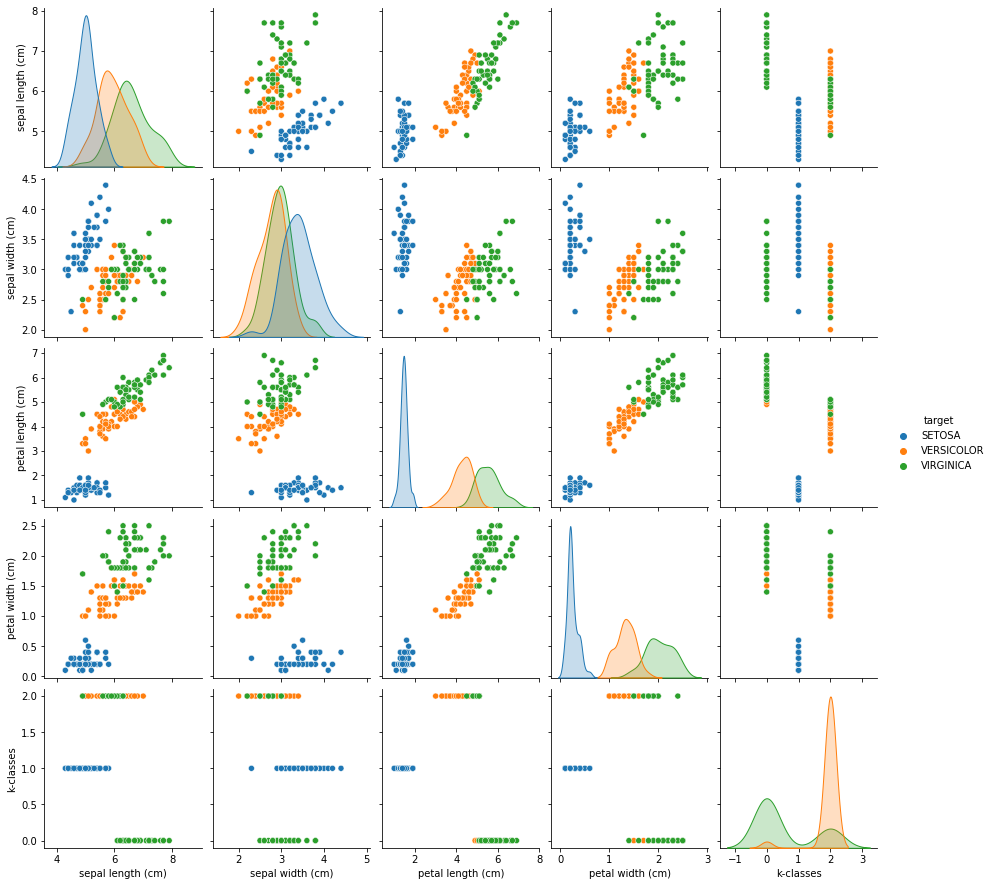

In [21]:
sb.pairplot(df,hue='target')

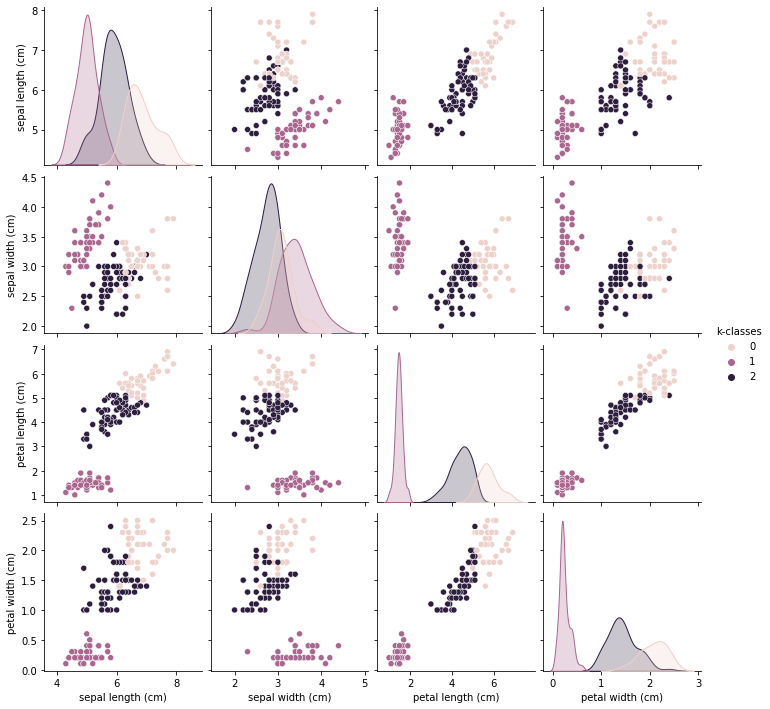

In [22]:
sb.pairplot(df,hue='k-classes')